# Plot Scratchpad Results

## Prerequisites

In [1]:
import copy
import datetime
import importlib
import re

from pathlib import Path

import numpy as np
from tqdm import tqdm

import plotnine as p9

import pandas as pd
from collections import deque

from utils import add_src_to_sys_path

add_src_to_sys_path()

from common import wandb_utils, nest
from common import plotnine_utils as p9u

wandb_utils = importlib.reload(wandb_utils)
p9u = importlib.reload(p9u)

## Load the experiments

In [2]:
tags = ["instruction_length_dist"]

In [3]:
plot_dir_name = "__".join(tags)
output_dir = Path("output_plots") / f"{plot_dir_name}"
output_dir.mkdir(parents=True, exist_ok=True)

In [5]:
# df = wandb_utils.download_and_load_results(
#     tags=tags,
#     force_download=True,
# )
# len(df)

  0%|          | 0/401 [00:00<?, ?it/s]

Building dataframe...
Saving results to /Users/amirhosein/Development/PycharmProjects/len_gen/results/sanity_check.jsonl


401

In [63]:
instruction_lengths_datasets = [
    "cot_fsopt",
    "cot_submix",
    "cot_zsopt",
    "niv2_submix",
]

df_lst = []
for fn in instruction_lengths_datasets:
    df = pd.read_csv(wandb_utils.get_repo_dir() / "results" / f"instruct_lengths_{fn}.csv")
    if fn == "niv2_submix":
#         Sample 200000, with seed 42
        df = df.sample(n=180000, random_state=42)

    print(fn, len(df))
    df["dataset"] = fn
    df_lst.append(df)

df = pd.concat(df_lst)
df

cot_fsopt 182340
cot_submix 193511
cot_zsopt 95079
niv2_submix 180000


,input_len,target_len,task_source,idx,dataset
0,681,122,CoT,0,cot_fsopt
1,425,39,CoT,1,cot_fsopt
2,391,29,CoT,2,cot_fsopt
3,139,32,CoT,3,cot_fsopt
4,278,33,CoT,4,cot_fsopt
...,...,...,...,...,...
986705,55,23,NIv2,986705,niv2_submix
1438794,167,2,NIv2,1438794,niv2_submix
4025403,210,2,NIv2,4025403,niv2_submix
1698523,88,4,NIv2,1698523,niv2_submix


## Plot Instruction Lengths

In [27]:
from matplotlib import rc
rc('text', usetex=True)

pdf = df


pdf = pdf[pdf["dataset"] == "cot_fsopt"]
pdf["instance_len"] = pdf["input_len"] + pdf["target_len"]

column = "target_len"

print(len(pdf))

182340


/var/folders/1v/7yt3f78s4xq7g51lj7r4v9800000gn/T/ipykernel_84935/3072926237.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [35]:
# Sample pandas dataframe
# pdf = pdf.sample(n=1000)

/usr/local/miniconda3/envs/comp-gen_v2/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_histogram : Removed 1 rows containing missing values.


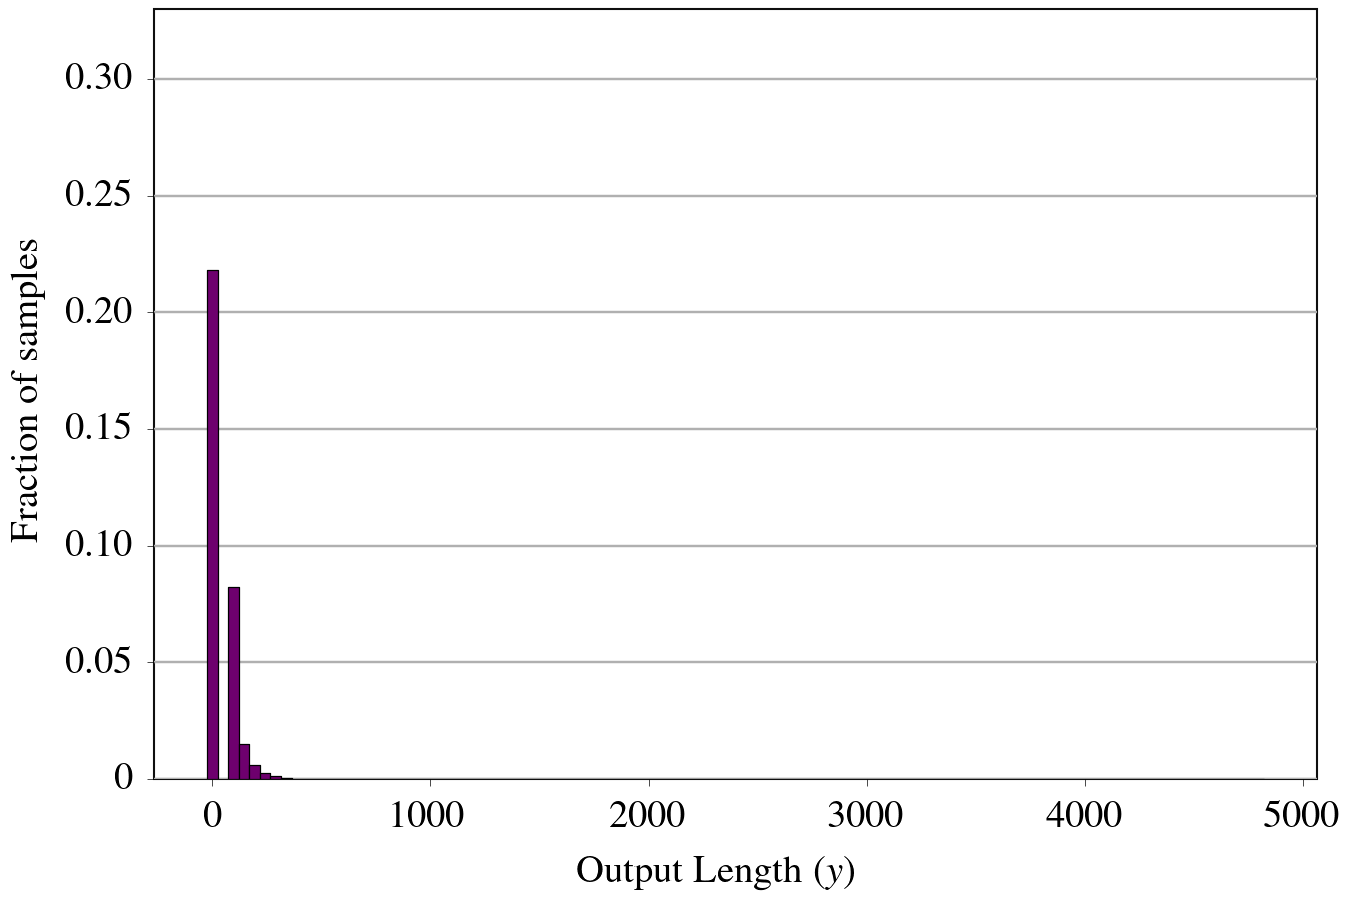

<ggplot: (8763163144117)>

In [8]:
p9 = importlib.reload(p9)

p = (
    p9.ggplot(pdf, p9.aes(x="target_len", y=p9.after_stat('width*density')))
    + p9.geom_histogram(
        bins=100,
        color="black",
        fill="#6E006E",
        # size=1,
        # width=0.6,
    )
    + p9.scale_y_continuous(
        breaks=np.arange(0, 1, 0.05),
        limits=[0, 0.33],
        expand = (0, 0)
    )
#     + p9.facet_wrap("dataset", ncol=1)
    + p9.labs(
        x=r"Output Length ($y$)",
        y="Fraction of samples",
        # y=r"\textbf{Training} Context Size (Number of Tokens)",
        # color=None,
        # fill=None,
    )
#     + p9u.scale_fill_prism("mila_purples_reverse")
#     + p9u.scale_color_prism("formal")
    #         + p9.theme_light()
    + p9u.theme_formal(grid="Y",
                       axis_text_size=28,
                       base_size=28,
                      )
#     + p9.theme_minimal()
#     + p9u.theme_ipsum(grid="XY", base_family="Times New Roman", axis_title_size=12, axis_text_size=12)
    + p9.theme(
#         #             plot_margin=0,
# #         text=p9.element_text(size=10),
# #         panel_spacing=,
#         legend_position="none",
#         # legend_box="vertical",
#         axis_title=p9.element_text(size=28),
#         axis_title_y=p9.element_text(margin=dict(r=30)),
        figure_size=(15, 10)
    )
)
# p.save(output_dir / f"context_size.pdf", dpi=300)
p

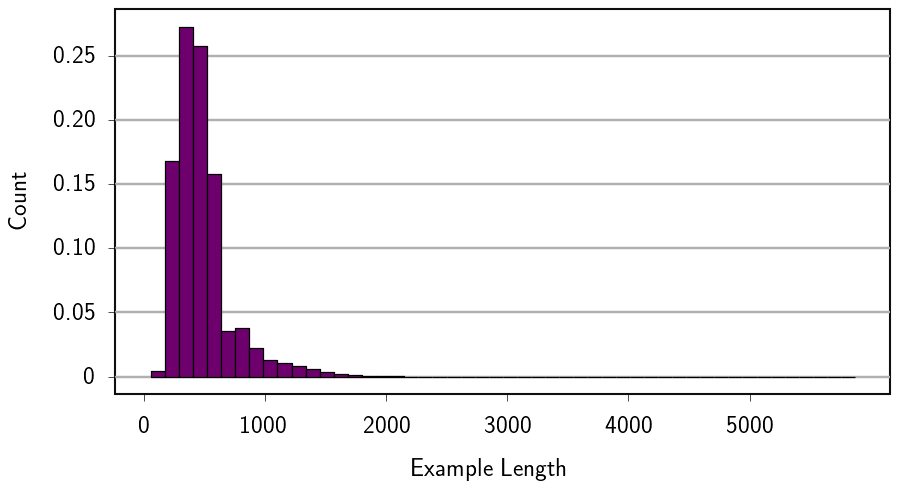

<ggplot: (8763163456404)>

In [32]:
p9 = importlib.reload(p9)

p = (
    p9.ggplot(pdf, p9.aes(x="instance_len", y=p9.after_stat('width*density')))
    + p9.geom_histogram(
        bins=50,
        color="black",
        fill="#6E006E",
        # size=1,
        # width=0.6,
    )
    + p9.scale_y_continuous(
        breaks=np.arange(0, 1, 0.05),
#         limits=[0, 55000],
#         expand = (0, 0)
    )
    + p9.scale_x_continuous(
        breaks=np.arange(0, 6000, 1000),
#         limits=[0, 55000],
#         expand = (0, 0)
    )
#     + p9.facet_wrap("dataset", ncol=1)
    + p9.labs(
        x=r"Example Length",
        y="Fraction",
        # y=r"\textbf{Training} Context Size (Number of Tokens)",
        # color=None,
        # fill=None,
    )
#     + p9u.scale_fill_prism("mila_purples_reverse")
#     + p9u.scale_color_prism("formal")
    #         + p9.theme_light()
    + p9u.theme_formal(grid="Y",
                       axis_text_size=18,
#                        base_size=28,
                       base_family="Computer Modern Sans serif",
                      )
#     + p9.theme_minimal()
#     + p9u.theme_ipsum(grid="XY", base_family="Times New Roman", axis_title_size=12, axis_text_size=12)
    + p9.theme(
#         #             plot_margin=0,
# #         text=p9.element_text(size=10),
# #         panel_spacing=,
#         legend_position="none",
#         # legend_box="vertical",
#         axis_title=p9.element_text(size=28),
#         axis_title_y=p9.element_text(margin=dict(r=30)),
        figure_size=(10, 5)
    )
)
# p.save(output_dir / f"instance_seq_len_flan.pdf", dpi=300)
p

/var/folders/1v/7yt3f78s4xq7g51lj7r4v9800000gn/T/ipykernel_84935/885198822.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/miniconda3/envs/comp-gen_v2/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 10 x 5 in image.
/usr/local/miniconda3/envs/comp-gen_v2/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: output_plots/instruction_length_dist/instance_seq_len_flan.pdf


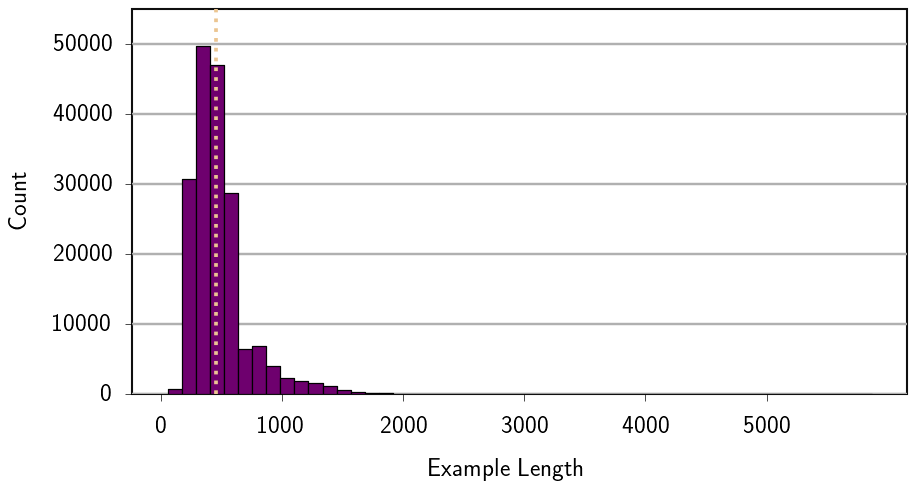

<ggplot: (8763062947503)>

In [71]:
p9 = importlib.reload(p9)

pdf = df


pdf = pdf[pdf["dataset"] == "cot_fsopt"]
pdf["instance_len"] = pdf["input_len"] + pdf["target_len"]

median = pdf["instance_len"].median()

p = (
    p9.ggplot(pdf, p9.aes(
        x="instance_len", 
#         y=p9.after_stat('width*density')
    ))
    + p9.geom_histogram(
        bins=50,
        color="black",
        fill="#6E006E",
        # size=1,
        # width=0.6,
    )
    + p9.geom_vline(xintercept=median, linetype="dotted",
                color = "#EBC591", size=1.5)
    + p9.scale_y_continuous(
#         breaks=np.arange(0, 1, 0.05),
        limits=[0, 55000],
        expand = (0, 0)
    )
    + p9.scale_x_continuous(
        breaks=np.arange(0, 6000, 1000),
#         limits=[0, 55000],
#         expand = (0, 0)
    )
#     + p9.facet_wrap("dataset", ncol=1)
    + p9.labs(
        x=r"Example Length",
        y="Count",
        # y=r"\textbf{Training} Context Size (Number of Tokens)",
        # color=None,
        # fill=None,
    )
#     + p9u.scale_fill_prism("mila_purples_reverse")
#     + p9u.scale_color_prism("formal")
    #         + p9.theme_light()
    + p9u.theme_formal(grid="Y",
                       axis_text_size=18,
#                        base_size=28,
                       base_family="Computer Modern Sans serif",
                      )
#     + p9.theme_minimal()
#     + p9u.theme_ipsum(grid="XY", base_family="Times New Roman", axis_title_size=12, axis_text_size=12)
    + p9.theme(
#         #             plot_margin=0,
# #         text=p9.element_text(size=10),
# #         panel_spacing=,
#         legend_position="none",
#         # legend_box="vertical",
#         axis_title=p9.element_text(size=28),
#         axis_title_y=p9.element_text(margin=dict(r=30)),
        figure_size=(10, 5)
    )
)
p.save(output_dir / f"instance_seq_len_flan.pdf", dpi=300)
p

In [16]:
len(df)

670930

/var/folders/1v/7yt3f78s4xq7g51lj7r4v9800000gn/T/ipykernel_84935/3947783485.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


180000


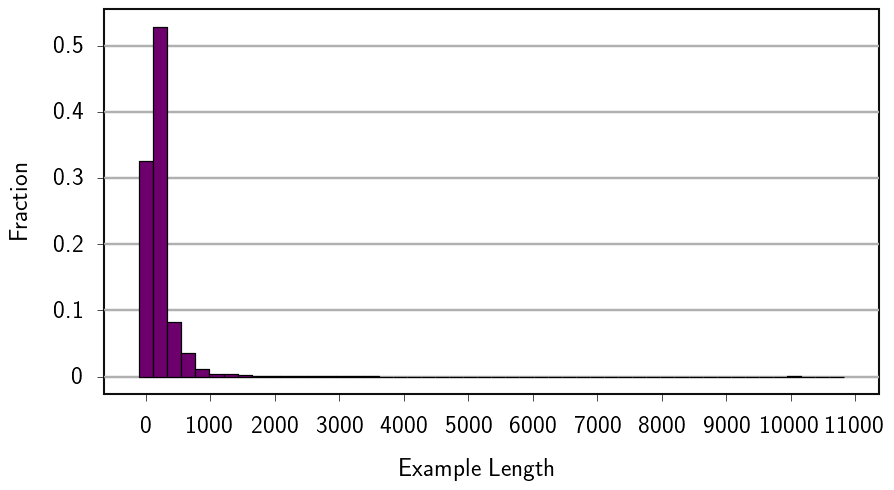

<ggplot: (8763067536249)>

In [72]:
from matplotlib import rc
rc('text', usetex=True)

pdf = df


pdf = pdf[pdf["dataset"] == "niv2_submix"]
pdf["instance_len"] = pdf["input_len"] + pdf["target_len"]

column = "target_len"

print(len(pdf))

p9 = importlib.reload(p9)

p = (
    p9.ggplot(pdf, p9.aes(x="instance_len", y=p9.after_stat('width*density')))
    + p9.geom_histogram(
        bins=50,
        color="black",
        fill="#6E006E",
        # size=1,
        # width=0.6,
    )
    + p9.scale_y_continuous(
        breaks=np.arange(0, 1, 0.1),
#         limits=[0, 55000],
#         expand = (0, 0)
    )
    + p9.scale_x_continuous(
        breaks=np.arange(0, 12000, 1000),
#         limits=[0, 55000],
#         expand = (0, 0)
    )
#     + p9.facet_wrap("dataset", ncol=1)
    + p9.labs(
        x=r"Example Length",
        y="Fraction",
        # y=r"\textbf{Training} Context Size (Number of Tokens)",
        # color=None,
        # fill=None,
    )
#     + p9u.scale_fill_prism("mila_purples_reverse")
#     + p9u.scale_color_prism("formal")
    #         + p9.theme_light()
    + p9u.theme_formal(grid="Y",
                       axis_text_size=18,
#                        base_size=28,
                       base_family="Computer Modern Sans serif",
                      )
#     + p9.theme_minimal()
#     + p9u.theme_ipsum(grid="XY", base_family="Times New Roman", axis_title_size=12, axis_text_size=12)
    + p9.theme(
#         #             plot_margin=0,
# #         text=p9.element_text(size=10),
# #         panel_spacing=,
#         legend_position="none",
#         # legend_box="vertical",
#         axis_title=p9.element_text(size=28),
#         axis_title_y=p9.element_text(margin=dict(r=30)),
        figure_size=(10, 5)
    )
)
# p.save(output_dir / f"instance_seq_len_flan.pdf", dpi=300)
p

/var/folders/1v/7yt3f78s4xq7g51lj7r4v9800000gn/T/ipykernel_84935/2354806373.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/miniconda3/envs/comp-gen_v2/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 10 x 5 in image.
/usr/local/miniconda3/envs/comp-gen_v2/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: output_plots/instruction_length_dist/instance_seq_len_niv2.pdf


180000


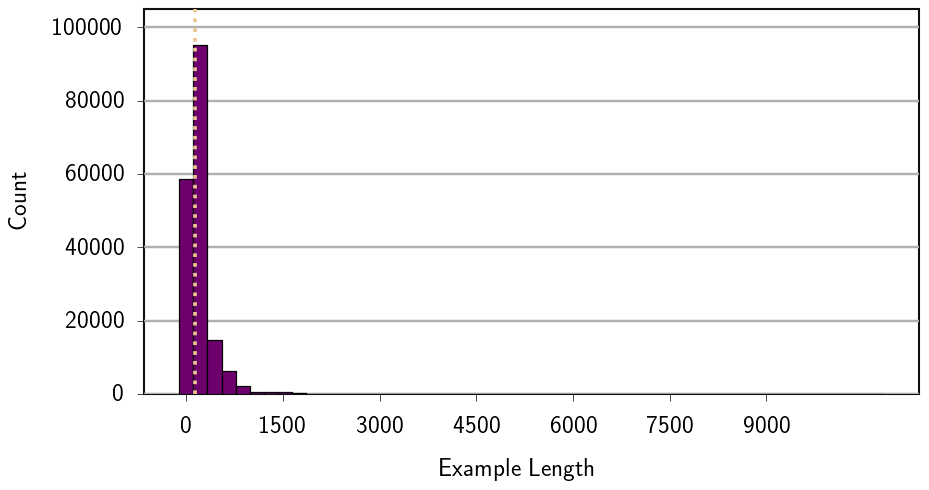

<ggplot: (8763167468234)>

In [75]:
from matplotlib import rc
rc('text', usetex=True)

pdf = df


pdf = pdf[pdf["dataset"] == "niv2_submix"]
pdf["instance_len"] = pdf["input_len"] + pdf["target_len"]

median = pdf['instance_len'].median()
median

print(len(pdf))

p9 = importlib.reload(p9)

p = (
    p9.ggplot(pdf, p9.aes(
        x="instance_len", 
#         y=p9.after_stat('width*density')
    ))
    + p9.geom_histogram(
        bins=50,
        color="black",
        fill="#6E006E",
        # size=1,
        # width=0.6,
    )
    + p9.geom_vline(xintercept=median, linetype="dotted",
                color = "#EBC591", size=1.5)
    + p9.scale_y_continuous(
        breaks=np.arange(0, 120000, 20000),
        limits=[0, 105000],
        expand = (0, 0)
    )
    + p9.scale_x_continuous(
        breaks=np.arange(0, 10000, 1500),
# #         limits=[0, 55000],
# #         expand = (0, 0)
    )
#     + p9.facet_wrap("dataset", ncol=1)
    + p9.labs(
        x=r"Example Length",
        y="Count",
        # y=r"\textbf{Training} Context Size (Number of Tokens)",
        # color=None,
        # fill=None,
    )
#     + p9u.scale_fill_prism("mila_purples_reverse")
#     + p9u.scale_color_prism("formal")
    #         + p9.theme_light()
    + p9u.theme_formal(grid="Y",
                       axis_text_size=18,
#                        base_size=28,
                       base_family="Computer Modern Sans serif",
                      )
#     + p9.theme_minimal()
#     + p9u.theme_ipsum(grid="XY", base_family="Times New Roman", axis_title_size=12, axis_text_size=12)
    + p9.theme(
#         #             plot_margin=0,
# #         text=p9.element_text(size=10),
# #         panel_spacing=,
#         legend_position="none",
#         # legend_box="vertical",
#         axis_title=p9.element_text(size=28),
#         axis_title_y=p9.element_text(margin=dict(r=30)),
        figure_size=(10, 5)
    )
)
p.save(output_dir / f"instance_seq_len_niv2.pdf", dpi=300)
p

/var/folders/1v/7yt3f78s4xq7g51lj7r4v9800000gn/T/ipykernel_84935/1794291216.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/1v/7yt3f78s4xq7g51lj7r4v9800000gn/T/ipykernel_84935/1794291216.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/1v/7yt3f78s4xq7g51lj7r4v9800000gn/T/ipykernel_84935/1794291216.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

       dataset  median              pretty_dataset
0  niv2_submix   141.0  Super-Natural Instructions
1    cot_fsopt   454.0                  FLAN (CoT)


/usr/local/miniconda3/envs/comp-gen_v2/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 20 x 5 in image.
/usr/local/miniconda3/envs/comp-gen_v2/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: output_plots/instruction_length_dist/instance_len_flan_niv2.pdf
/usr/local/miniconda3/envs/comp-gen_v2/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_histogram : Removed 4 rows containing missing values.
/usr/local/miniconda3/envs/comp-gen_v2/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_histogram : Removed 4 rows containing missing values.


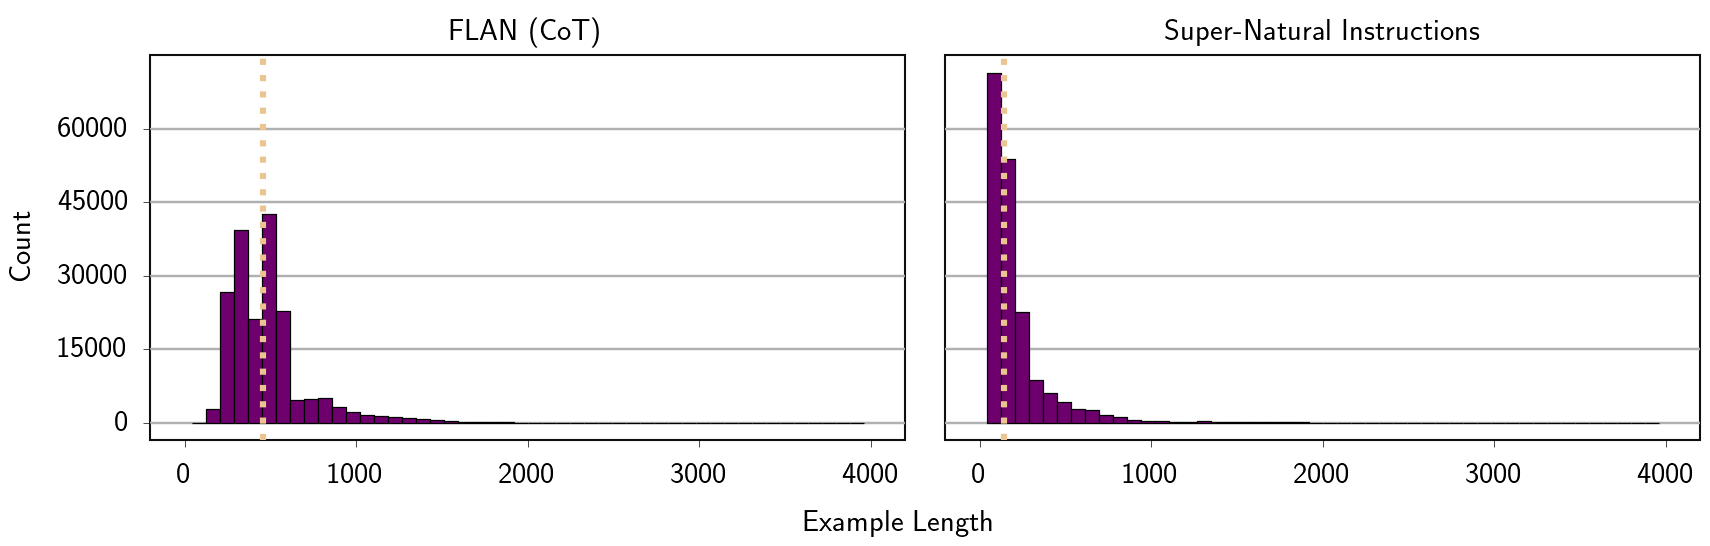

<ggplot: (8763067496105)>

In [114]:
# Combined

pdf1 = df[df["dataset"] == "niv2_submix"]
pdf1["pretty_dataset"] = "Super-Natural Instructions"
pdf1["instance_len"] = pdf1["input_len"] + pdf1["target_len"]
pdf1 = pdf1[pdf1["instance_len"] <= 4000] 

pdf2 = df[df["dataset"] == "cot_fsopt"]
pdf2["pretty_dataset"] = "FLAN (CoT)"
pdf2["instance_len"] = pdf2["input_len"] + pdf2["target_len"]
pdf2 = pdf2[pdf2["instance_len"] <= 4000] 

median_pdf = pd.DataFrame.from_records(
    {
        "dataset": ["niv2_submix", "cot_fsopt"],
        "pretty_dataset": ["Super-Natural Instructions", "FLAN (CoT)"],
        "median": [pdf1["instance_len"].median(), pdf2["instance_len"].median()]
    }
)

pdf = pd.concat([
    pdf1, pdf2
])

from matplotlib import rc
rc('text', usetex=True)


print(median_pdf)
# print(len(median))

p9 = importlib.reload(p9)

p = (
    p9.ggplot(pdf, p9.aes(
        x="instance_len", 
#         y=p9.after_stat('width*density')
    ))
    + p9.geom_histogram(
        bins=50,
        color="black",
        fill="#6E006E",
        # size=1,
        # width=0.6,
    )
    + p9.geom_vline(data=median_pdf, mapping=p9.aes(xintercept="median"), linetype="dotted",
                color = "#EBC591", size=2.5)
    + p9.scale_y_continuous(
        breaks=np.arange(0, 120000, 15000),
#         limits=[0, 105000],
#         expand = (0, 0)
    )
    + p9.scale_x_continuous(
#         breaks=np.arange(0, 10000, 1500),
        limits=[0, 4000],
#         expand = (0, 0)
    )
    + p9.facet_wrap("pretty_dataset", ncol=2, scales="free_x")
    + p9.labs(
        x=r"Example Length",
        y="Count",
        # y=r"\textbf{Training} Context Size (Number of Tokens)",
        # color=None,
        # fill=None,
    )
#     + p9u.scale_fill_prism("mila_purples_reverse")
#     + p9u.scale_color_prism("formal")
    #         + p9.theme_light()
    + p9u.theme_formal(grid="Y",
                       axis_text_size=22,
                       base_size=22,
                       base_family="Computer Modern Sans serif",
                      )
#     + p9.theme_minimal()
#     + p9u.theme_ipsum(grid="XY", base_family="Times New Roman", axis_title_size=12, axis_text_size=12)
    + p9.theme(
#         #             plot_margin=0,
# #         text=p9.element_text(size=10),
        panel_spacing=0.4,
#         legend_position="none",
#         # legend_box="vertical",
        strip_text=p9.element_text(size=22),
        axis_title=p9.element_text(size=22),
#         axis_title_y=p9.element_text(margin=dict(r=30)),
        figure_size=(20, 5)
    )
)
p.save(output_dir / f"instance_len_flan_niv2.pdf", dpi=300)
p

In [ ]:
# Combined

pdf1 = df[df["dataset"] == "niv2_submix"]
pdf1["instance_len"] = pdf1["input_len"] + pdf1["target_len"]

pdf2 = df[df["dataset"] == "cot_fsopt"]
pdf2["instance_len"] = pdf2["input_len"] + pdf2["target_len"]

median_pdf = pd.DataFrame.from_records(
    {
        "dataset": ["niv2_submix", "cot_fsopt"],
        "median": [pdf1["instance_len"].median(), pdf2["instance_len"].median()]
    }
)

pdf = pd.concat([
    pdf1, pdf2
])

from matplotlib import rc
rc('text', usetex=True)

# pdf = df


# pdf = pdf[pdf["dataset"] == "niv2_submix"]
# pdf["instance_len"] = pdf["input_len"] + pdf["target_len"]

median = pdf['instance_len'].median()
median

print(len(pdf))

p9 = importlib.reload(p9)

p = (
    p9.ggplot(pdf, p9.aes(
        x="instance_len", 
#         y=p9.after_stat('width*density')
    ))
    + p9.geom_histogram(
        bins=50,
        color="black",
        fill="#6E006E",
        # size=1,
        # width=0.6,
    )
    + p9.geom_vline(data=median_pdf, mapping=p9.aes(xintercept="median"), linetype="dotted",
                color = "#EBC591", size=1.5)
#     + p9.scale_y_continuous(
#         breaks=np.arange(0, 120000, 20000),
#         limits=[0, 105000],
#         expand = (0, 0)
#     )
#     + p9.scale_x_continuous(
#         breaks=np.arange(0, 10000, 1500),
# #         limits=[0, 55000],
# #         expand = (0, 0)
#     )
    + p9.facet_wrap("dataset", ncol=2, scales="free_x")
    + p9.labs(
        x=r"Example Length",
        y="Count",
        # y=r"\textbf{Training} Context Size (Number of Tokens)",
        # color=None,
        # fill=None,
    )
#     + p9u.scale_fill_prism("mila_purples_reverse")
#     + p9u.scale_color_prism("formal")
    #         + p9.theme_light()
    + p9u.theme_formal(grid="Y",
                       axis_text_size=18,
#                        base_size=28,
                       base_family="Computer Modern Sans serif",
                      )
#     + p9.theme_minimal()
#     + p9u.theme_ipsum(grid="XY", base_family="Times New Roman", axis_title_size=12, axis_text_size=12)
    + p9.theme(
#         #             plot_margin=0,
# #         text=p9.element_text(size=10),
        panel_spacing=0.4,
#         legend_position="none",
#         # legend_box="vertical",
#         axis_title=p9.element_text(size=28),
#         axis_title_y=p9.element_text(margin=dict(r=30)),
        figure_size=(20, 5)
    )
)
# p.save(output_dir / f"instance_seq_len_niv2.pdf", dpi=300)
p

In [44]:
pdf['instance_len'].mean()

214.28847

In [41]:
# Compute the median of pdf['instance_len']
median = pdf['instance_len'].median()
median

141.0

In [ ]:
p9 = importlib.reload(p9)

p = (
    p9.ggplot(pdf, p9.aes(x="instance_len", y=p9.after_stat('width*density')))
    + p9.geom_histogram(
        bins=50,
        color="black",
        fill="#6E006E",
        # size=1,
        # width=0.6,
    )
    + p9.scale_y_continuous(
        breaks=np.arange(0, 1, 0.05),
#         limits=[0, 55000],
#         expand = (0, 0)
    )
    + p9.scale_x_continuous(
        breaks=np.arange(0, 6000, 1000),
#         limits=[0, 55000],
#         expand = (0, 0)
    )
#     + p9.facet_wrap("dataset", ncol=1)
    + p9.labs(
        x=r"Example Length",
        y="Fraction",
        # y=r"\textbf{Training} Context Size (Number of Tokens)",
        # color=None,
        # fill=None,
    )
#     + p9u.scale_fill_prism("mila_purples_reverse")
#     + p9u.scale_color_prism("formal")
    #         + p9.theme_light()
    + p9u.theme_formal(grid="Y",
                       axis_text_size=18,
#                        base_size=28,
                       base_family="Computer Modern Sans serif",
                      )
#     + p9.theme_minimal()
#     + p9u.theme_ipsum(grid="XY", base_family="Times New Roman", axis_title_size=12, axis_text_size=12)
    + p9.theme(
#         #             plot_margin=0,
# #         text=p9.element_text(size=10),
# #         panel_spacing=,
#         legend_position="none",
#         # legend_box="vertical",
#         axis_title=p9.element_text(size=28),
#         axis_title_y=p9.element_text(margin=dict(r=30)),
        figure_size=(10, 5)
    )
)
# p.save(output_dir / f"instance_seq_len_flan.pdf", dpi=300)
p

In [ ]:
p9 = importlib.reload(p9)

p = (
    p9.ggplot(pdf, p9.aes(
        x="instance_len", 
#         y=p9.after_stat('width*density')
    ))
    + p9.geom_histogram(
        bins=50,
        color="black",
        fill="#6E006E",
        # size=1,
        # width=0.6,
    )
    + p9.scale_y_continuous(
#         breaks=np.arange(0, 1, 0.05),
        limits=[0, 55000],
        expand = (0, 0)
    )
    + p9.scale_x_continuous(
        breaks=np.arange(0, 6000, 1000),
#         limits=[0, 55000],
#         expand = (0, 0)
    )
#     + p9.facet_wrap("dataset", ncol=1)
    + p9.labs(
        x=r"Example Length",
        y="Count",
        # y=r"\textbf{Training} Context Size (Number of Tokens)",
        # color=None,
        # fill=None,
    )
#     + p9u.scale_fill_prism("mila_purples_reverse")
#     + p9u.scale_color_prism("formal")
    #         + p9.theme_light()
    + p9u.theme_formal(grid="Y",
                       axis_text_size=18,
#                        base_size=28,
                       base_family="Computer Modern Sans serif",
                      )
#     + p9.theme_minimal()
#     + p9u.theme_ipsum(grid="XY", base_family="Times New Roman", axis_title_size=12, axis_text_size=12)
    + p9.theme(
#         #             plot_margin=0,
# #         text=p9.element_text(size=10),
# #         panel_spacing=,
#         legend_position="none",
#         # legend_box="vertical",
#         axis_title=p9.element_text(size=28),
#         axis_title_y=p9.element_text(margin=dict(r=30)),
        figure_size=(10, 5)
    )
)
p.save(output_dir / f"instance_seq_len_flan.pdf", dpi=300)
p

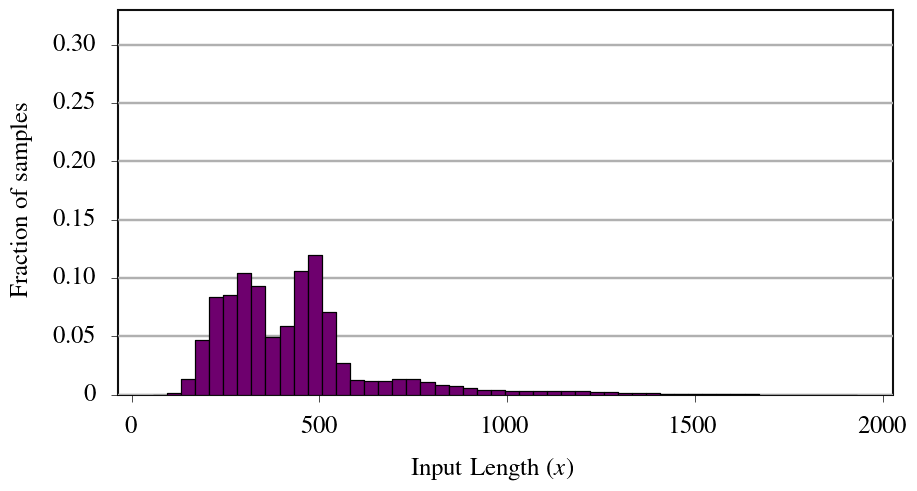

<ggplot: (8763165927668)>

In [6]:
p9 = importlib.reload(p9)

p = (
    p9.ggplot(pdf, p9.aes(x="input_len", y=p9.after_stat('width*density')))
    + p9.geom_histogram(
        bins=50,
        color="black",
        fill="#6E006E",
        # size=1,
        # width=0.6,
    )
    + p9.scale_y_continuous(
        breaks=np.arange(0, 1, 0.05),
        limits=[0, 0.33],
        expand = (0, 0)
    )
#     + p9.facet_wrap("dataset", ncol=1)
    + p9.labs(
        x=r"Input Length ($x$)",
        y="Fraction of samples",
        # y=r"\textbf{Training} Context Size (Number of Tokens)",
        # color=None,
        # fill=None,
    )
#     + p9u.scale_fill_prism("mila_purples_reverse")
#     + p9u.scale_color_prism("formal")
    #         + p9.theme_light()
    + p9u.theme_formal(grid="Y",
                       axis_text_size=18,
#                        base_size=28,
                      )
#     + p9.theme_minimal()
#     + p9u.theme_ipsum(grid="XY", base_family="Times New Roman", axis_title_size=12, axis_text_size=12)
    + p9.theme(
#         #             plot_margin=0,
# #         text=p9.element_text(size=10),
# #         panel_spacing=,
#         legend_position="none",
#         # legend_box="vertical",
#         axis_title=p9.element_text(size=28),
#         axis_title_y=p9.element_text(margin=dict(r=30)),
        figure_size=(10, 5)
    )
)
# p.save(output_dir / f"context_size.pdf", dpi=300)
p

## Plot side by side

In [98]:
from matplotlib import rc
rc('text', usetex=True)

pdf = df


pdf = pdf[pdf["dataset"] == "cot_fsopt"]
pdf["instance_len"] = pdf["input_len"] + pdf["target_len"]

# Sample pandas dataframe
# pdf = pdf.sample(n=50000)

pdf_lst = []
for c in ["input_len", "target_len", "instance_len"]:
    xpdf = pdf.copy()
    xpdf["len"] = xpdf[c]
    if c == "input_len":
        xpdf["type"] = "Input"
    elif c == "target_len":
        xpdf["type"] = "Output"
    else:
        xpdf["type"] = "Instance"
    pdf_lst.append(xpdf)

pdf = pd.concat(pdf_lst)

column = "target_len"

print(len(pdf))

547020


/var/folders/1v/7yt3f78s4xq7g51lj7r4v9800000gn/T/ipykernel_19693/3934966528.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/usr/local/miniconda3/envs/comp-gen_v2/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 19 x 5 in image.
/usr/local/miniconda3/envs/comp-gen_v2/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: output_plots/instruction_length_dist/side_by_side.pdf
/usr/local/miniconda3/envs/comp-gen_v2/lib/python3.9/site-packages/plotnine/facets/facet.py:440: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.
/usr/local/miniconda3/envs/comp-gen_v2/lib/python3.9/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'
/usr/local/miniconda3/envs/comp-gen_v2/lib/python3.9/site-packages/plotnine/facets/facet.py:440: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_

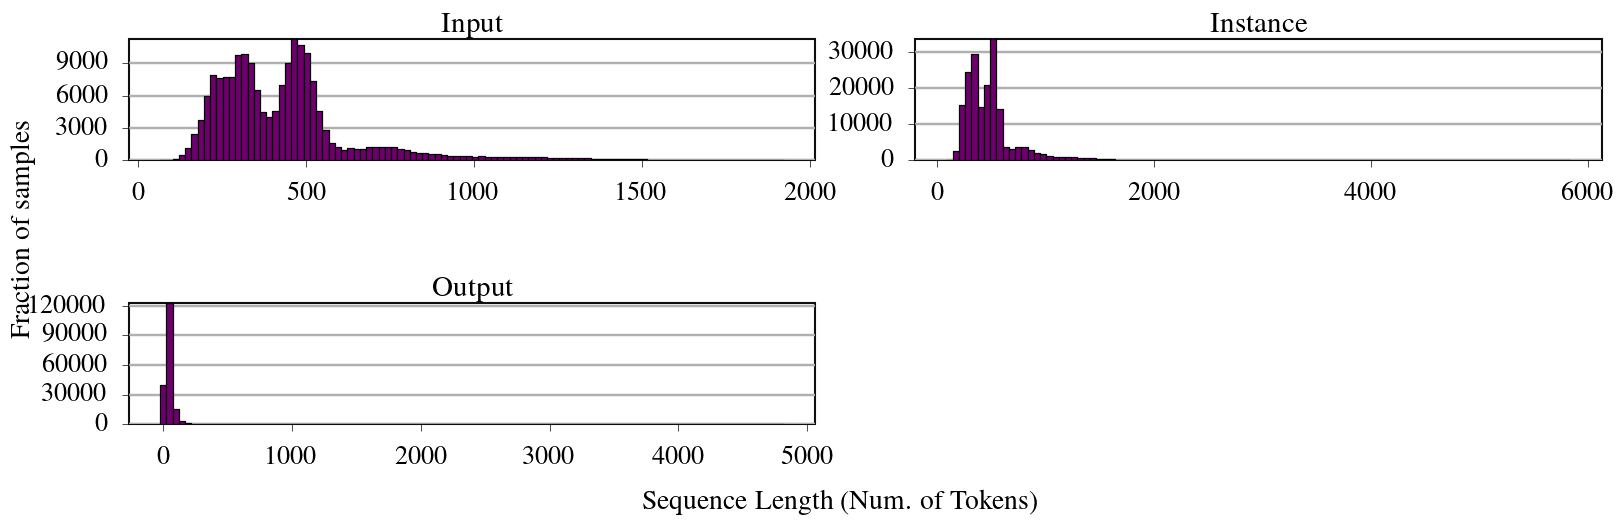

<ggplot: (8778411186005)>

In [100]:
p9 = importlib.reload(p9)

p = (
    p9.ggplot(pdf, p9.aes(
        x="len", 
#         y=p9.after_stat('width*density')
    ))
    + p9.geom_histogram(
        bins=100,
        color="black",
        fill="#6E006E",
        # size=1,
        # width=0.6,
    )
    + p9.scale_y_continuous(
#         breaks=np.arange(0, 1, 0.05),
#         limits=[0, 0.4],
        expand = (0, 0)
    )
    + p9.facet_wrap("type", ncol=2, scales="free")
    + p9.labs(
        x=r"Sequence Length (Num. of Tokens)",
        y="Fraction of samples",
        # y=r"\textbf{Training} Context Size (Number of Tokens)",
        # color=None,
        # fill=None,
    )
#     + p9u.scale_fill_prism("mila_purples_reverse")
#     + p9u.scale_color_prism("formal")
    #         + p9.theme_light()
    + p9u.theme_formal(grid="Y",
                       axis_text_size=19,
                       base_size=20,
                       strip_text_size=21,
                      )
#     + p9.theme_minimal()
#     + p9u.theme_ipsum(grid="XY", base_family="Times New Roman", axis_title_size=12, axis_text_size=12)
    + p9.theme(
#         #             plot_margin=0,
# #         text=p9.element_text(size=10),
        panel_spacing=1,
#         legend_position="none",
#         # legend_box="vertical",
        axis_title=p9.element_text(size=20),
#         axis_title_y=p9.element_text(margin=dict(r=30)),
        figure_size=(19, 5)
    )
)
p.save(output_dir / f"side_by_side.pdf", dpi=300)
p